In [290]:
#hãy dự báo điểm thi đánh giá năng lực phần NGONNGU
#dựa trên điểm thi T5 và T6 sử dụng mô hình hồi quy tuyến tính
#NGONNGU = f(T5,T6) = A0 + A1*T5 + A2*T6 + epsilon
#với các thiết lập tập training chiếm 80% và random state = 16

In [291]:
import pandas as pd
import matplotlib.pyplot as plt

In [292]:
df = pd.read_csv('DataLT/dulieuxettuyendaihoc.csv', header=0, delimiter=',', encoding='utf-8')

In [293]:
df = df[['T5','T6','NGONNGU', 'TOANLOGICPHANTICH','GIAIQUYETVANDE']]

In [294]:
df.rename(columns={'TOANLOGICPHANTICH' : 'LOGIC', 'GIAIQUYETVANDE':'UNGXU'},inplace=True)

In [295]:
df[['T5', 'T6','NGONNGU']].head(5)

,T5,T6,NGONNGU
0,7.4,6.9,3.25
1,3.0,4.0,6.00
2,4.8,5.7,5.00
3,6.1,7.4,4.25
4,6.8,8.0,4.25


In [296]:
df[['T5', 'T6']].corr()

,T5,T6
T5,1.000000,0.778683
T6,0.778683,1.000000


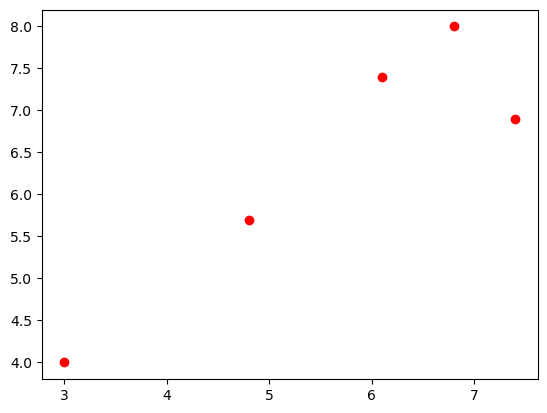

In [297]:
plt.plot(df[['T5']][0:5], df[['T6']][0:5], 'ro')
plt.show()

In [298]:
X= df[['T5', 'T6']].values #input
y= df[['NGONNGU']].values #output

#Đảm bảo dữ liệu là kiểu số thực

X = X.astype(float)
y = y.astype(float)

In [299]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=16)

In [300]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [301]:
print(model.intercept_)

#For retriving the slope ( coefficient)
print(model.coef_)

[4.01205005]
[[ 0.19517246 -0.23194661]]


In [302]:
pd.DataFrame(X_test).to_csv("DataLT/input_test2.csv")

In [303]:
pd.DataFrame(y_test).to_csv("DataLT/output_test2.csv")

In [304]:
import numpy as np
from sklearn import metrics

y_test_pred = model.predict(X_test)
y_test_pred

array([[3.74585912],
       [4.28584787],
       [3.25170331],
       [3.51703355],
       [3.81176569],
       [3.63158978],
       [4.04258212],
       [3.53513373],
       [3.61178564],
       [3.87541191],
       [3.60443081],
       [3.65449755],
       [3.62536513],
       [3.59962322],
       [3.81488672],
       [3.61207254],
       [3.5102351 ],
       [3.6177234 ],
       [4.12319835],
       [3.68023945]])

In [305]:
pd.DataFrame(y_test_pred).to_csv("output_test_pred2.csv")

In [306]:
print("Mean absolute Error:" , metrics.mean_absolute_error(y_test, y_test_pred))
print("Mean squared Error:" , metrics.mean_squared_error(y_test, y_test_pred))
print("Root Mean squared Error:" , np.sqrt(metrics.mean_absolute_error(y_test, y_test_pred)))

#Càng lớn càng tốt
print("Score:" , model.score(X_test, y_test))

Mean absolute Error: 1.1905472933346881
Mean squared Error: 1.987412256869439
Root Mean squared Error: 1.091122034116573
Score: -0.07691460875153755


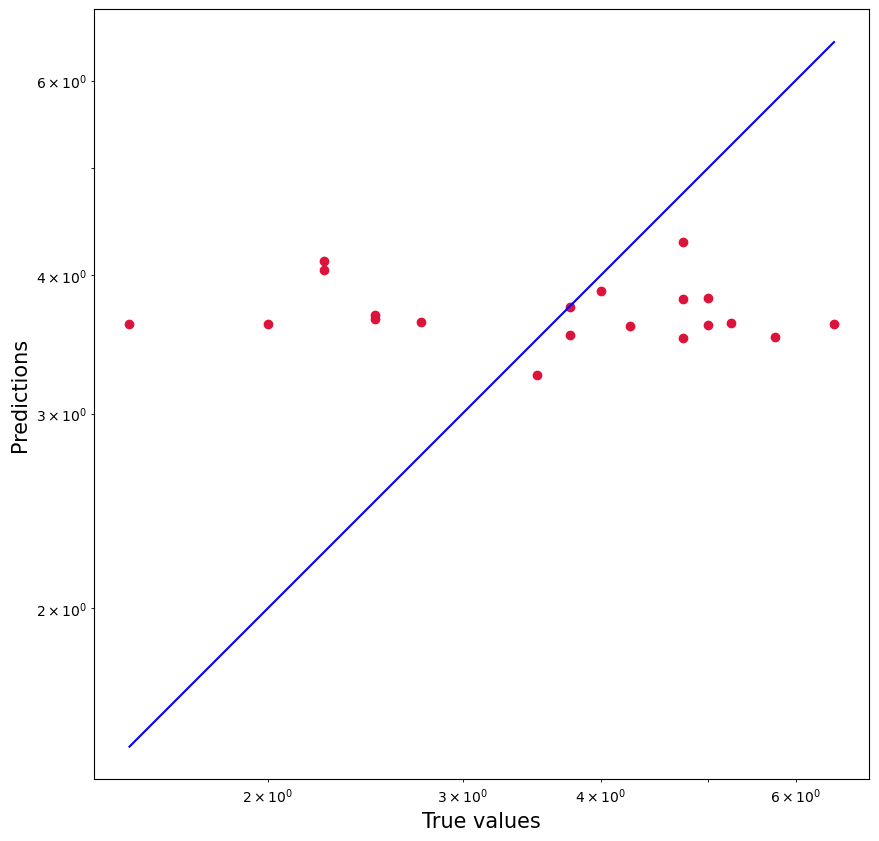

In [307]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_test_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1=max(max(y_test_pred), max(y_test))
p2=min(min(y_test_pred), min(y_test))
plt.plot([p1,p2], [p1,p2], 'b-')
plt.xlabel('True values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [308]:
import pickle
pickle.dump(model, open('DataLT/model_dubao_ngonngu2.sav','wb'))

In [309]:
# #Xây dựng ctrinh: Nhập điểm T5, T6 từ bàn phím

# import pickle
# #Load model tu storage
# loaded_model = pickle.load(open('DataLT/model_dubao_ngonngu.sav','rb'))

# vT5 = float(input('Nhap T5:'))
# vT6 = float(input('Nhap T6:'))

# predicted_vlogic = loaded_model.predict([[vT5, vT6]])

# print(f'Du bao diem thi NGONNGU la {predicted_vlogic}')

In [310]:
X= df[['T5', 'T6']].values #input
y= df[['NGONNGU']].values #output

In [311]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

Các phương pháp đánh giá mô hình học máy - Dạng hồi quy để đánh giá trên tập dữ liệu huấn luyện ( train ) và đánh giá (test, evaluation)

<h4>Tính toán các MAE, MSE, RMISE trên các tập training và test để đánh giá mô hình. Sau đó, đưa ra kết luận</h4>

In [312]:
import pandas as pd
import matplotlib.pyplot as plt

In [313]:
df = pd.read_csv('DataLT/dulieuxettuyendaihoc.csv', header=0, delimiter=',', encoding='utf-8')

In [314]:
import numpy as pd
from sklearn import metrics

y_test_pred = model.predict(X_test)

print("score or R-Squared", model.score(X_test, y_test))

print("Mean absolute Error:" , metrics.mean_absolute_error(y_test, y_test_pred))
print("Mean squared Error:" , metrics.mean_squared_error(y_test, y_test_pred))
print("Root Mean squared Error:" , np.sqrt(metrics.mean_absolute_error(y_test, y_test_pred)))

score or R-Squared -0.07691460875153755
Mean absolute Error: 1.1905472933346881
Mean squared Error: 1.987412256869439
Root Mean squared Error: 1.091122034116573


<h1>Cách 2: Dùng Scatter giữa aCtual và Predict</h1>

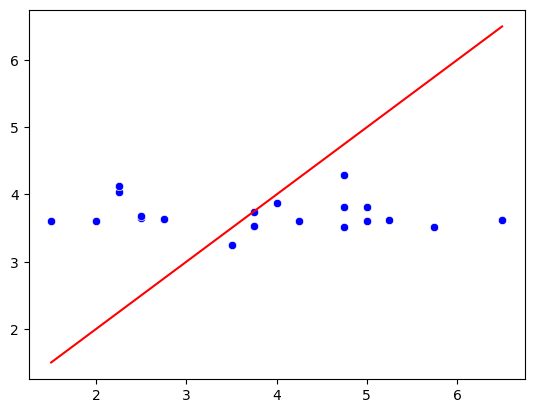

In [315]:
import seaborn as sns
sns.lineplot(x=y_test.flatten(), y=y_test.flatten(), color="r")
sns.scatterplot(x=y_test.flatten(), y=y_test_pred.flatten(), color="b")
plt.show()

<h1>Cách 3: Dùng Residual plot</h1>

In [316]:
import pandas as pd
y_test_pred = model.predict(X_test)
dfTestValidation = pd.DataFrame(list(zip(X_test[:,0], X_test[:,1], y_test.flatten(),y_test_pred.flatten())),columns=['T5_test','T6_test','y_test','y_test_predicted'])
dfTestValidation['Residual'] = dfTestValidation['y_test'] - dfTestValidation['y_test_predicted']
dfTestValidation

,T5_test,T6_test,y_test,y_test_predicted,Residual
0,8.5,8.3,3.75,3.745859,0.004141
1,5.8,3.7,4.75,4.285848,0.464152
2,6.8,9.0,3.50,3.251703,0.248297
3,4.0,5.5,5.75,3.517034,2.232966
4,8.6,8.1,4.75,3.811766,0.938234
5,5.3,6.1,2.75,3.631590,-0.881590
6,8.0,6.6,2.25,4.042582,-1.792582
7,5.4,6.6,3.75,3.535134,0.214866
8,7.1,7.7,2.00,3.611786,-1.611786
9,7.5,6.9,4.00,3.875412,0.124588


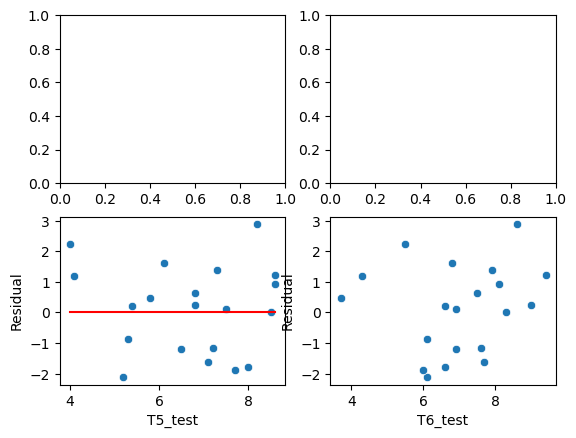

In [317]:
fig, axes = plt.subplots(2, 2)
sns.scatterplot(data=dfTestValidation, x="T5_test", y="Residual", ax=axes[1,0])
sns.lineplot(data=dfTestValidation, x="T5_test",y=[0]*len(dfTestValidation),color="r", ax=axes[1,0])
sns.scatterplot(data=dfTestValidation, x="T6_test", y="Residual", ax=axes[1,1])
plt.show()

<h1>Cách 4 Dùng histogram plot</h1>

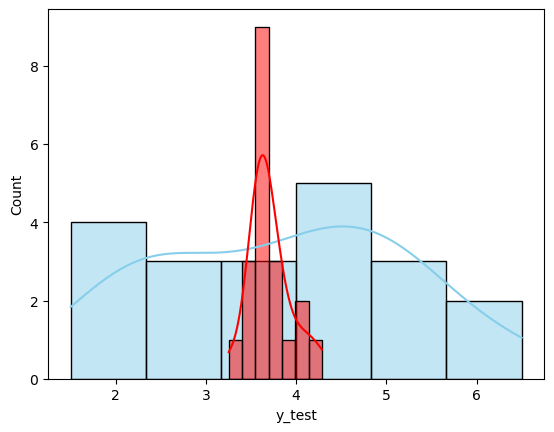

In [318]:
sns.histplot(data=dfTestValidation, x="y_test", color="skyblue",label="Actual", kde=True)
sns.histplot(data=dfTestValidation, x="y_test_predicted", color="red",label="Forecast", kde=True)
plt.show()

Mô hình trên không tốt do đường đỏ và xanh không gần khớp với nhau
Cả 2 phải đi gần giống như nhau mới tốt

In [ ]:
#underfitting: Mô hình có giá trị Bias ( error ) cao

In [321]:
import pandas as pd
y_train_pred = model.predict(X_train)
dfTestValidation = pd.DataFrame(list(zip(X_train[:,0], X_train[:,1], y_train.flatten(),y_train_pred.flatten())),columns=['T5_test','T6_test','y_train','y_train_predicted'])
dfTestValidation['Residual'] = dfTestValidation['y_train'] - dfTestValidation['y_train_predicted']
dfTestValidation

,T5_test,T6_test,y_train,y_train_predicted,Residual
0,5.5,5.7,5.25,3.763403,1.486597
1,8.5,7.8,1.50,3.861832,-2.361832
2,8.9,8.5,6.25,3.777539,2.472461
3,4.9,6.5,1.00,3.460742,-2.460742
4,8.0,7.2,4.50,3.903414,0.596586
...,...,...,...,...,...
75,6.3,8.0,4.50,3.386064,1.113936
76,8.4,8.1,3.75,3.772731,-0.022731
77,5.0,5.1,2.00,3.804985,-1.804985
78,3.5,5.6,2.25,3.396253,-1.146253


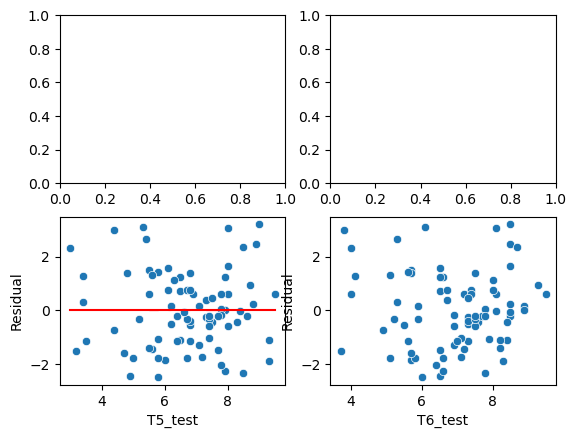

In [323]:
fig, axes = plt.subplots(2, 2)
sns.scatterplot(data=dfTestValidation, x="T5_test", y="Residual", ax=axes[1,0])
sns.lineplot(data=dfTestValidation, x="T5_test",y=[0]*len(dfTestValidation),color="r", ax=axes[1,0])
sns.scatterplot(data=dfTestValidation, x="T6_test", y="Residual", ax=axes[1,1])
plt.show()

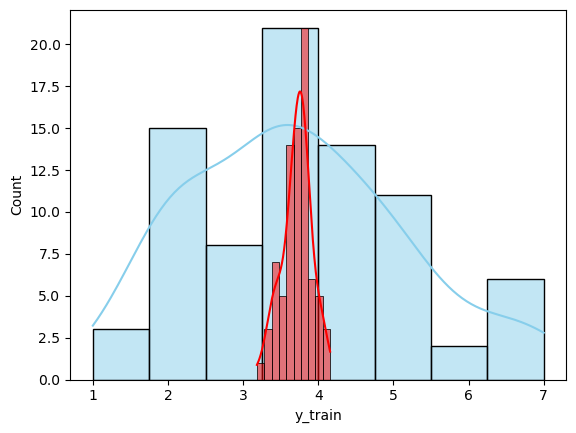

In [326]:
sns.histplot(data=dfTestValidation, x="y_train", color="skyblue",label="Actual", kde=True)
sns.histplot(data=dfTestValidation, x="y_train_predicted", color="red",label="Forecast", kde=True)
plt.show()

In [ ]:
#train có Bias cao và tập test có bias: Underfitting
#train có bias thấp và test bias thấp: Fitting
#Train có variance cao và test có bias cao: OverFitting

#Mô hình máy học tốt: Bias thấp và Variance thấp
#Bias thấp có nghĩa là lỗi thấp
#Variance thấp có nghĩa là sự chi tiết thấp ( đa dạng thấp) hay sự tổng quát cao

In [328]:
import pickle
pickle.dump(model, open('model_dubao_ngonngu.sav','wb'))

#Load model tu storage
loaded_model = pickle.load(open('model_dubao_ngonngu.sav','rb'))

vT5 = float(input('Nhap T5:'))
vT6 = float(input('Nhap T6:'))

predicted_vlogic = loaded_model.predict([[vT5, vT6]])

print(f'Du bao diem thi NGONNGU la {predicted_vlogic}')

Du bao diem thi NGONNGU la [[3.43783439]]


In [ ]:
# dựa trên các điểm thi đánh giá năng lực
# hãy phán đoán xem sinh viên có định hướng nghề nghiệp
# hay chưa được định hướng nghề nghiệp

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [330]:
df = pd.read_csv('DataLT/dulieuxettuyendaihoc.csv', header=0, delimiter=',', encoding='utf-8')

In [331]:
df = df[['NGONNGU', 'TOANLOGICPHANTICH','GIAIQUYETVANDE','DINHHUONGNGHENGHIEP']]

In [332]:
df.rename(columns={'TOANLOGICPHANTICH' : 'LOGIC', 'GIAIQUYETVANDE':'UNGXU','DINHHUONGNGHENGHIEP': 'DINHHUONG'},inplace=True)

In [333]:
dinhhuong = pd.get_dummies(df['DINHHUONG'], drop_first=True)
df.drop('DINHHUONG', axis=1, inplace=True)
df=pd.concat([df,dinhhuong], axis=1)
df.head(5)

,NGONNGU,LOGIC,UNGXU,Yes
0,3.25,3.25,4.50,0
1,6.00,4.00,3.50,1
2,5.00,6.75,4.00,0
3,4.25,4.25,5.25,0
4,4.25,4.50,5.00,0


In [334]:
X= df[['NGONNGU', 'LOGIC', 'UNGXU']].values #input
y= df[['Yes']].values #output

In [335]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=16)

In [336]:
from sklearn import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

NameError: name 'LogisticRegression' is not defined